In [1]:
import sys

sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt

from scripts.neuralnetwork.autoencoder import Autoencoder

/home/daan/.anaconda3/envs/pacs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# name of the trained autoencoder to be uploaded
model_name = "FN_autoencoder"

# Instanciate the object
ae = Autoencoder(latent_dim=None, model_name=model_name)

In [3]:
# Load the test dataset
test = np.load("../../dataset/FN_testset/FN_testset_0.npz")["data"][0]

# Encode and decode the data
encoded = ae.encode(test, smooth=True)
decoded = ae.decode(encoded)

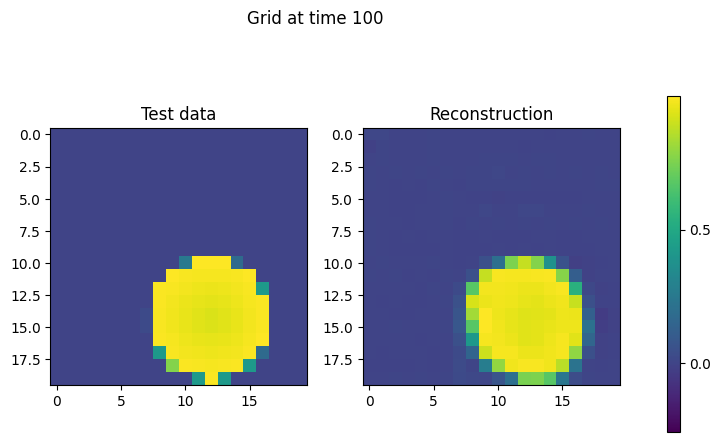

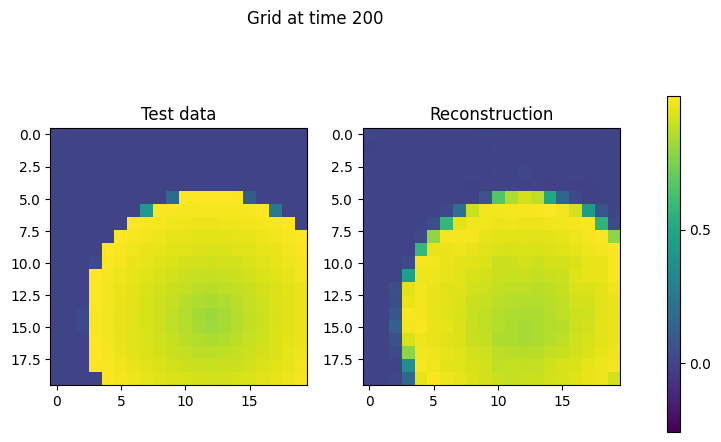

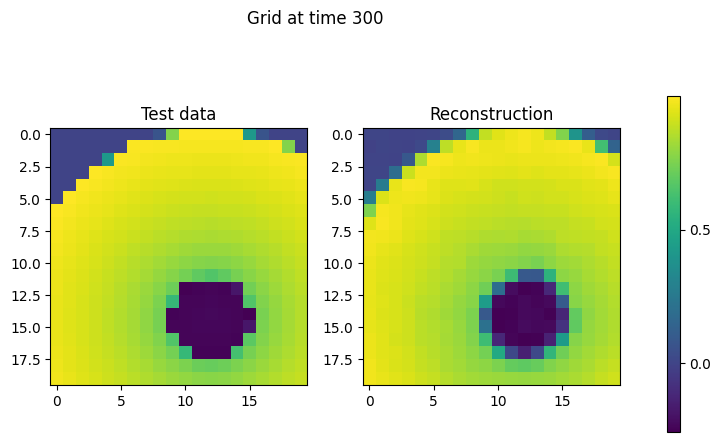

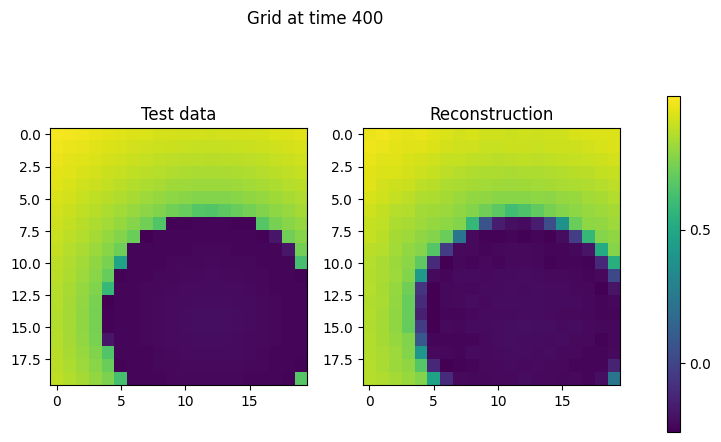

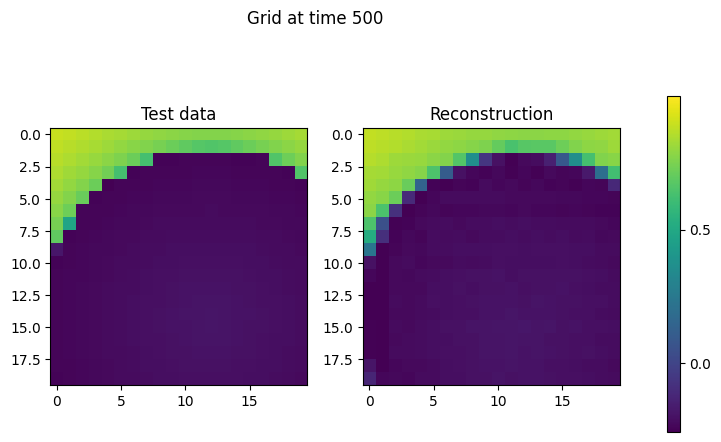

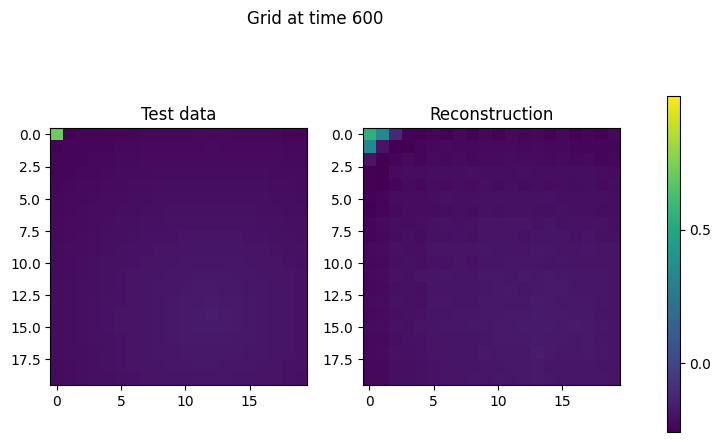

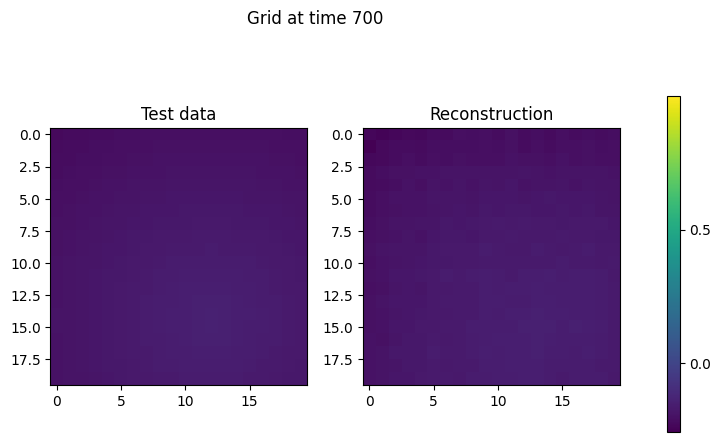

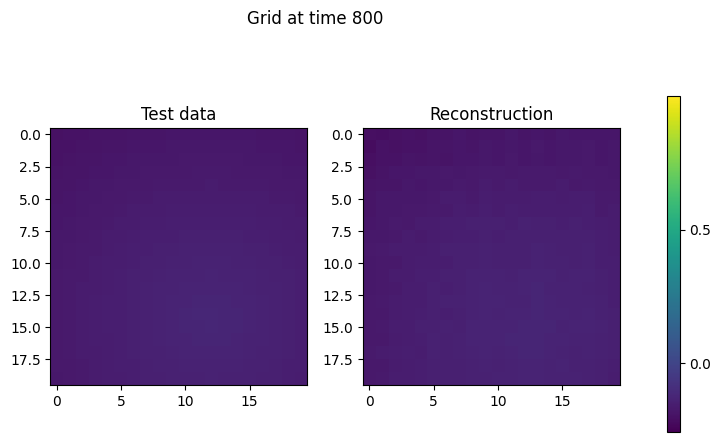

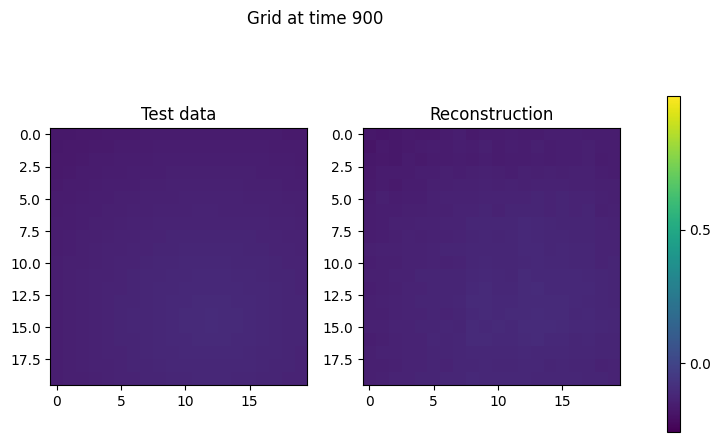

In [19]:
# Plot the test dataset vs decoded dataset

# each plot represents the entire grid at a fixed time instant t, indicated in the title of the figure

min_0 = np.min(test[:, :, :, 0])
max_0 = np.max(test[:, :, :, 0])

for i in [100 * i for i in range(10)]:
    if i != 0:
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(test[i, :, :, 0], vmin=min_0, vmax=max_0)
        ax[0].set_title("Test data")

        im = ax[1].imshow(decoded[i, :, :, 0], vmin=min_0, vmax=max_0)
        ax[1].set_title("Reconstruction")

        cbar_ax = fig.add_axes([1.05, 0.1, 0.02, 0.7])
        cbar = fig.colorbar(im, cax=cbar_ax, ax=ax.ravel().tolist())
        cbar.set_ticks(np.arange(0, 1, 0.5))
        fig.suptitle(f"Grid at time {i}")
        plt.tight_layout()
        plt.show()

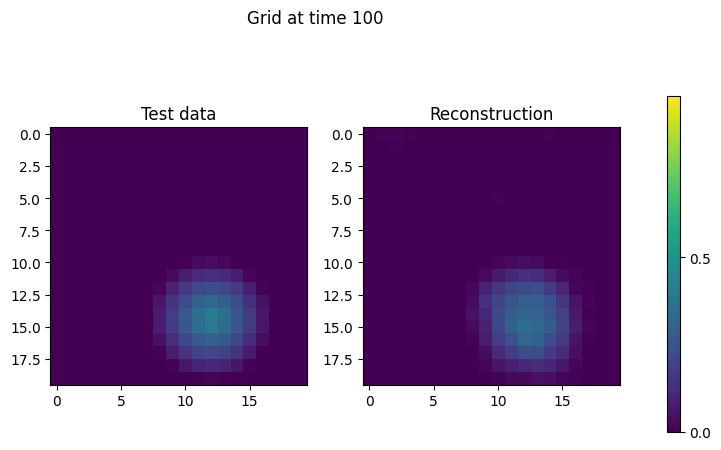

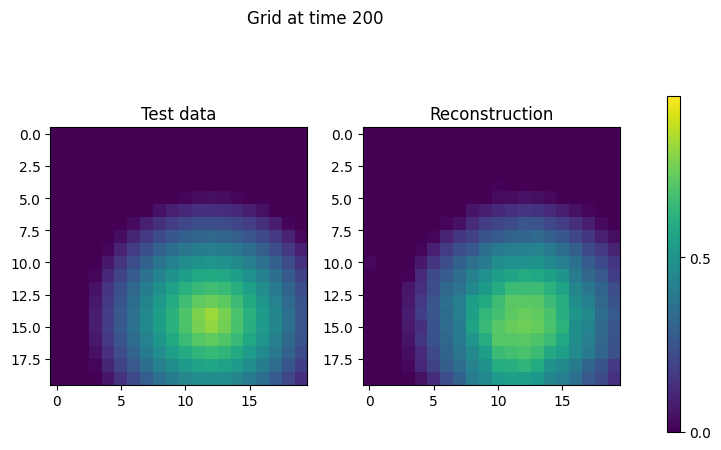

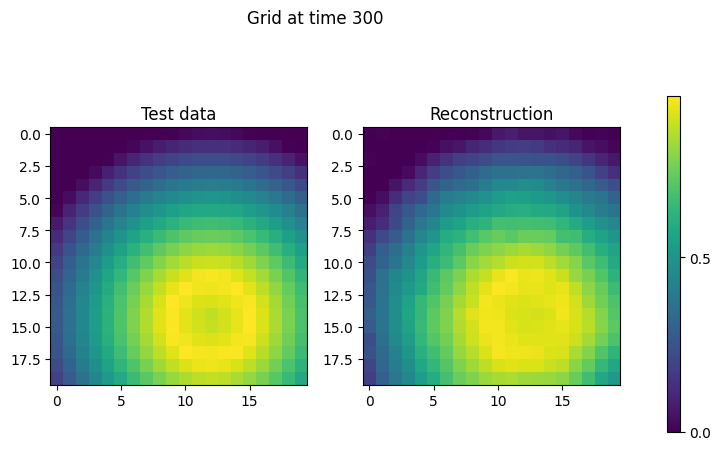

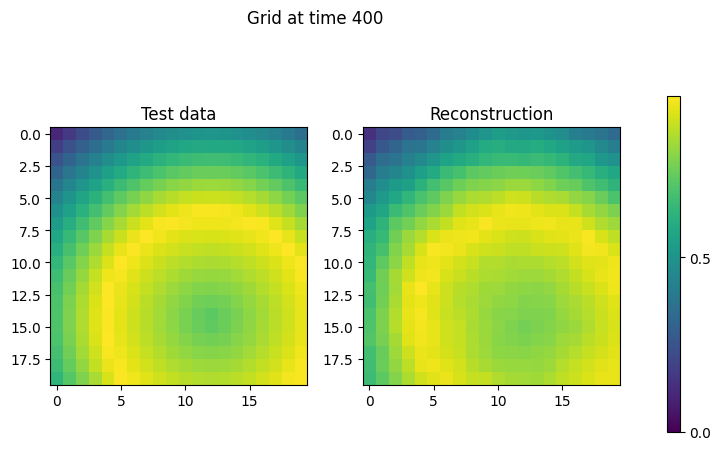

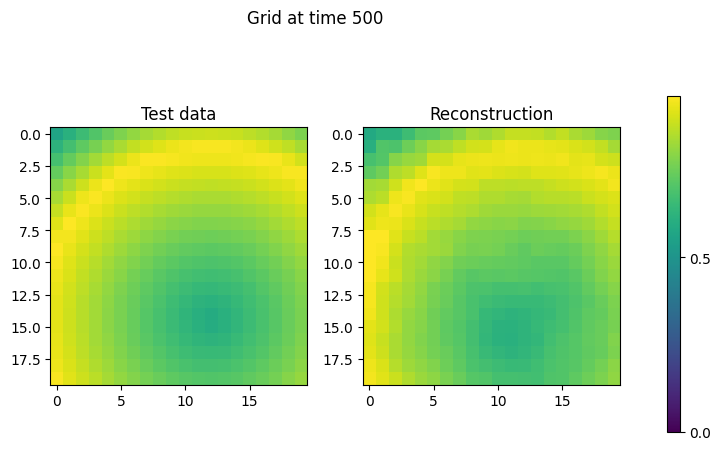

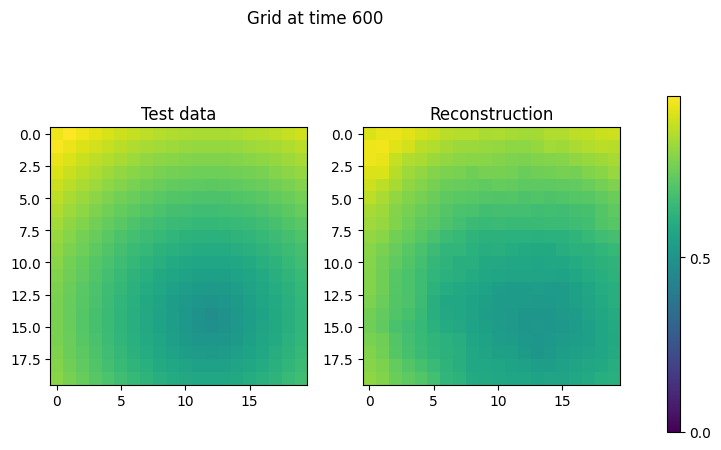

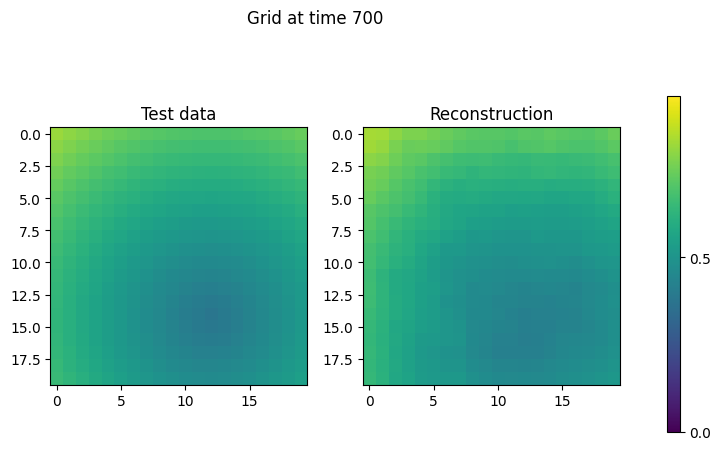

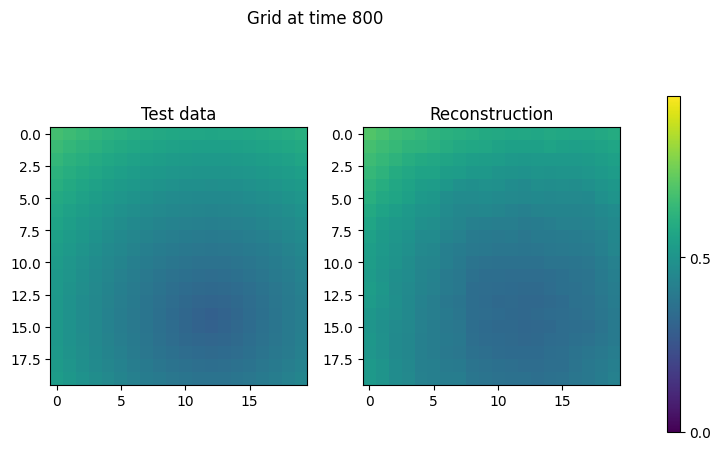

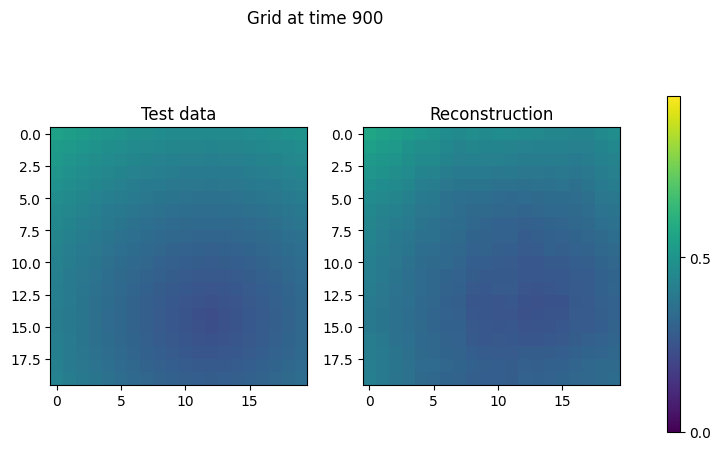

In [20]:
min_1 = np.min(test[:, :, :, 1])
max_1 = np.max(test[:, :, :, 1])


for i in [100 * i for i in range(10)]:
    if i != 0:
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(test[i, :, :, 1], vmin=min_1, vmax=max_1)
        ax[0].set_title("Test data")

        im = ax[1].imshow(decoded[i, :, :, 1], vmin=min_1, vmax=max_1)
        ax[1].set_title("Reconstruction")

        cbar_ax = fig.add_axes([1.05, 0.1, 0.02, 0.7])
        cbar = fig.colorbar(im, cax=cbar_ax, ax=ax.ravel().tolist())
        cbar.set_ticks(np.arange(0, 1, 0.5))
        fig.suptitle(f"Grid at time {i}")
        plt.tight_layout()
        plt.show()

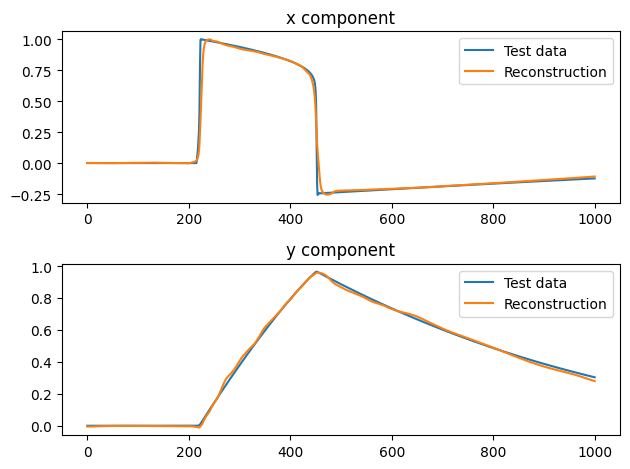

In [22]:
# Plot the test dataset vs decoded dataset

# each plot represents the the time evolution of the variables x and y for a fixed particle (x0,y0) of the grid
x0 = 4
y0 = 9

fig, ax = plt.subplots(2, 1)
ax[0].plot(test[:, x0, y0, 0])
ax[0].plot(decoded[:, x0, y0, 0])
ax[0].set_title("x component")

ax[1].plot(test[:, x0, y0, 1])
ax[1].set_title("y component")
ax[1].plot(decoded[:, x0, y0, 1])

ax[0].legend(["Test data", "Reconstruction"])
ax[1].legend(["Test data", "Reconstruction"])

plt.tight_layout()
plt.show()